In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import os
from scipy.stats import norm
from SBRxx import sosf,acf,ps,sosfnorm,sosfw,sosfw2,sosfs,sosfnorms

plt.rcParams["font.family"]="Times New Roman"
plt.rcParams["font.size"]="15"

In [2]:
#Input
#Constant
c=299792.459#km/s
#Iraf
corrhelio=25.68#km/s
#Theory Lambda
lr=[6562.8,6548,6583,6717,6731]#AngstromsR
#lb=[4861.36,4958.9,5006.9]#AngstromsB
#LimitData
min0=65
max0=145

In [3]:
inputf='604.Isis.WHT.Red.txt'

data0=pd.read_table(inputf)
data1=data0.rename(columns={"Center":"Center.0","ErrC":"ErrC.0","Width":"Width.0","ErrW":"ErrW.0","Peak":"Peak.0","ErrP":"ErrP.0",})

mr=(data1.X<max0)&(data1.X>min0)
data1=data1[mr]

In [4]:
for i in range(1):
    Nx=i
    N=str(Nx)

    data2=data1[['X','Y','Center.'+N,'Peak.'+N,'Width.'+N]]

    RVo=c*(data2["Center."+N]-lr[Nx])/lr[Nx]
    RV=RVo+corrhelio

    data2=data2.assign(RV=RV.values)

    a=[data2.X,data2.Y,data2.RV,data2['Peak.'+N]]
    data3=pd.DataFrame(a).T
    data3.columns=['X','Y','RV','I']
    data3.to_csv('dataI'+str(int(lr[Nx]))+'.csv')

In [5]:
datap='dataI6562.csv'
dt=pd.read_csv(datap)
dt=dt.rename(columns={'Unnamed: 0':'No'})
dt=dt.drop('No',axis=1)
os.remove(datap)
dt.describe()

,X,Y,RV,I
count,600.000000,600.000000,600.000000,600.000000
mean,105.269000,9.390000,-250.043594,2277.239467
std,23.243169,6.256047,10.420092,3750.107456
min,65.710000,0.000000,-277.593319,27.150000
25%,85.485000,4.000000,-257.836471,281.925000
50%,105.270000,9.000000,-249.888052,1017.500000
75%,125.045000,15.000000,-244.018098,2403.500000
max,144.830000,19.600000,-205.463695,30960.000000


findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.


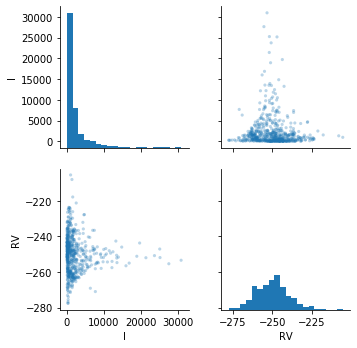

In [6]:
sns.pairplot(dt, 
             vars=["I","RV"], 
             diag_kind='hist',  
             plot_kws=dict(alpha=0.3, s=10, edgecolor='none'),
             diag_kws=dict(bins=20),
            )


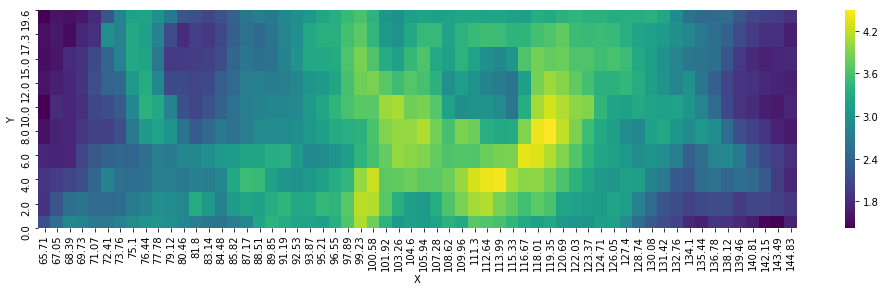

In [7]:
datal=dt.copy()
datal.I=np.log10(datal.I)
dataH_f=(datal.round(2)).pivot(index='Y', columns='X', values='I')
fig, ax = plt.subplots(figsize=(17, 4))
sns.heatmap(dataH_f, cmap="viridis")
plt.gca().invert_yaxis()

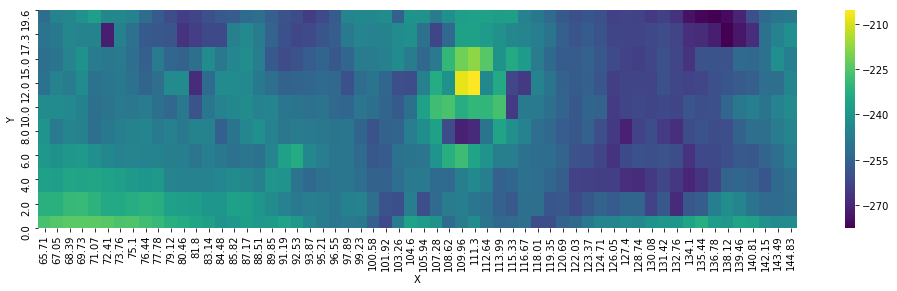

In [8]:
datal=dt.copy()
dataH_rv=(datal.round(2)).pivot(index='Y', columns='X', values='RV')
fig, ax = plt.subplots(figsize=(17, 4))
sns.heatmap(dataH_rv, cmap="viridis")
plt.gca().invert_yaxis()

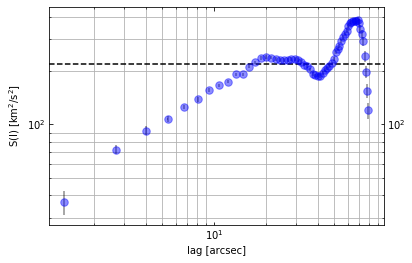

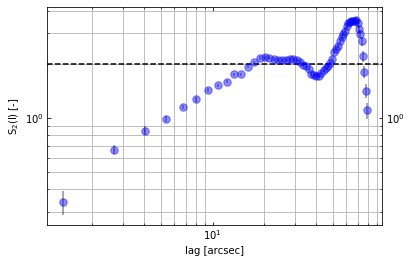

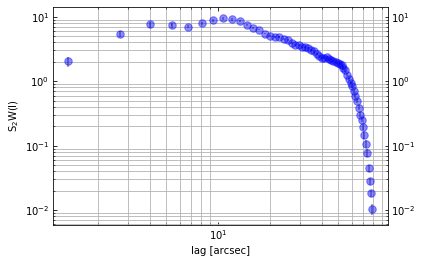

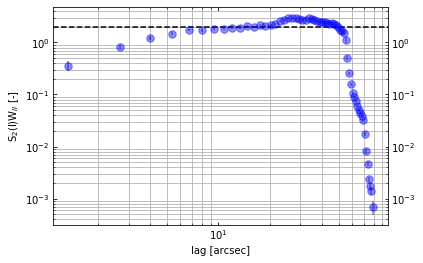

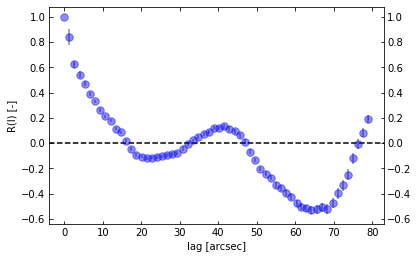

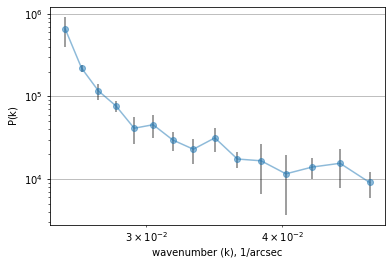

In [9]:
sfH00=sosf(dt)
sfnH00=sosfnorm(dt)
sfwH00=sosfw(dt)
sfw2H00=sosfw2(dt)
afH00=acf(dt)
psH00=ps(dt)

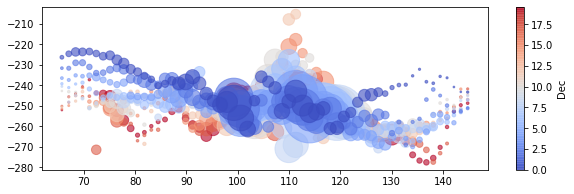

In [10]:
fig, ax = plt.subplots(figsize=(10, 3))
scat = plt.scatter(dt.X, dt.RV, c=dt.Y, s=dt.I*0.1, alpha=0.6, cmap="coolwarm")
fig.colorbar(scat, ax=ax).set_label("Dec")

In [11]:
pRA = np.poly1d(np.polyfit(dt.X, dt.RV, 3))
print(pRA)

           3           2
4.633e-05 x - 0.01411 x + 1.199 x - 274.2


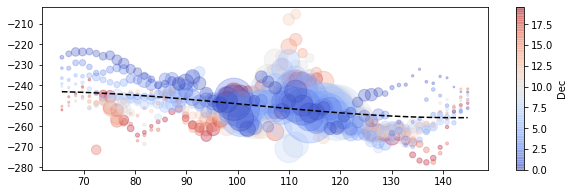

In [12]:
fig, ax = plt.subplots(figsize=(10, 3))
scat = plt.scatter(dt.X, dt.RV, c=dt.Y, s=dt.I*0.1, alpha=0.3, cmap="coolwarm")
fig.colorbar(scat, ax=ax).set_label("Dec")
RAgrid = np.linspace(dt.X.min(), dt.X.max())
ax.plot(RAgrid, pRA(RAgrid), c="k", ls="--")

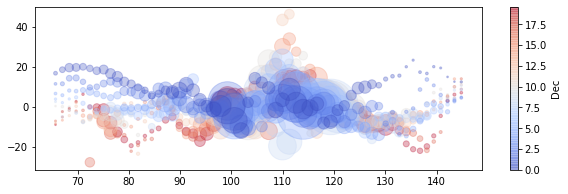

In [13]:
fig, ax = plt.subplots(figsize=(10, 3))
scat = plt.scatter(dt.X, dt.RV - pRA(dt.X), c=dt.Y, s=dt.I*0.1, alpha=0.3, cmap="coolwarm")
fig.colorbar(scat, ax=ax).set_label("Dec")

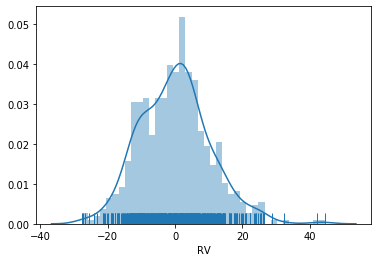

In [14]:
hist=dt.RV-dt.RV.mean()
sns.distplot(hist,bins=40,rug=True)

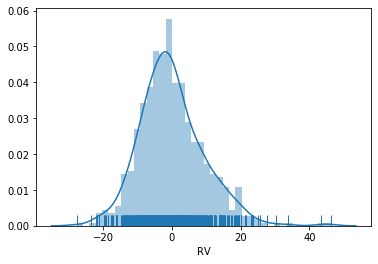

In [15]:
hist2=dt.RV - pRA(dt.X)
sns.distplot(hist2,bins=40,rug=True)

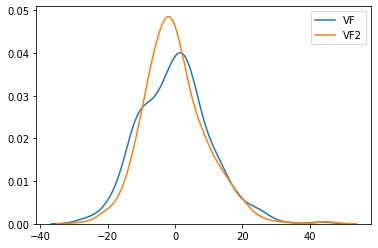

In [16]:
sns.kdeplot(hist, label="VF")
sns.kdeplot(hist2, label="VF2")

In [17]:
dtc= pd.DataFrame({'X': dt.X, 'Y': dt.Y, 'RV':dt.RV - pRA(dt.X), 'I':dt.I})
dtc.describe()

,X,Y,RV,I
count,600.000000,600.000000,6.000000e+02,600.000000
mean,105.269000,9.390000,-8.104924e-14,2277.239467
std,23.243169,6.256047,9.455325e+00,3750.107456
min,65.710000,0.000000,-2.768895e+01,27.150000
25%,85.485000,4.000000,-6.050071e+00,281.925000
50%,105.270000,9.000000,-9.031610e-01,1017.500000
75%,125.045000,15.000000,5.128628e+00,2403.500000
max,144.830000,19.600000,4.622969e+01,30960.000000


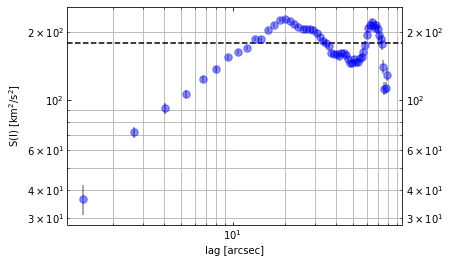

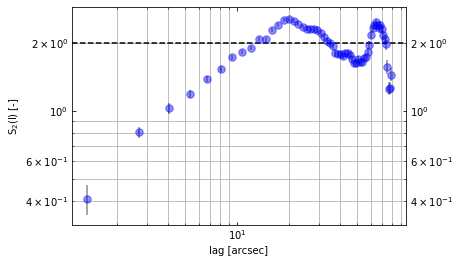

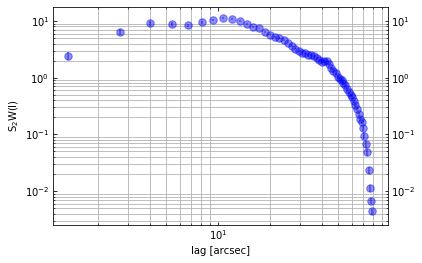

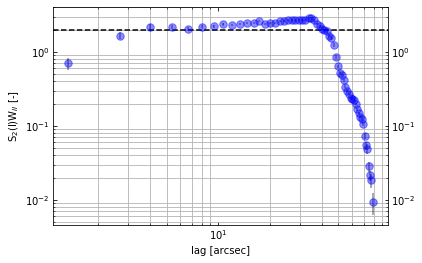

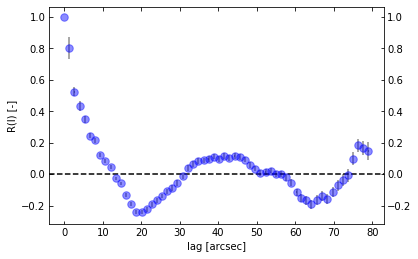

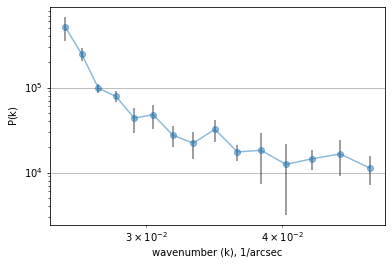

In [18]:
sfH00c=sosf(dtc)
sfnH00c=sosfnorm(dtc)
sfwH00c=sosfw(dtc)
sfw2H00c=sosfw2(dtc)
afH00c=acf(dtc)
psH00c=ps(dtc)

In [19]:
#II

In [20]:
mr=(dt.X<130)&(dt.X>85)
dt1=dt[mr]
dt1.describe()

,X,Y,RV,I
count,330.000000,330.000000,330.000000,330.00000
mean,107.280606,9.390000,-250.078110,3790.96303
std,12.788100,6.260324,9.698000,4506.06462
min,85.820000,0.000000,-270.969636,226.00000
25%,96.550000,4.000000,-256.934280,1275.25000
50%,107.280000,9.000000,-250.390538,2168.50000
75%,118.010000,15.000000,-244.714727,4462.00000
max,128.740000,19.600000,-205.463695,30960.00000


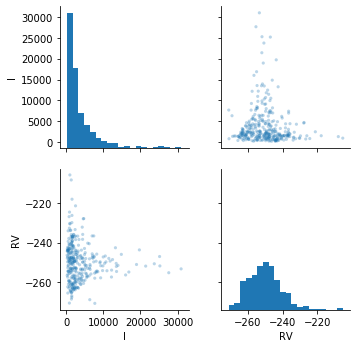

In [21]:
sns.pairplot(dt1, 
             vars=["I","RV"], 
             diag_kind='hist',  
             plot_kws=dict(alpha=0.3, s=10, edgecolor='none'),
             diag_kws=dict(bins=20),
            )

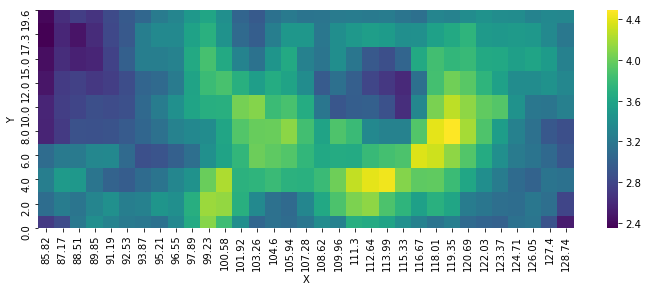

In [22]:
datal=dt1.copy()
datal.I=np.log10(datal.I)
dataH_f=(datal.round(2)).pivot(index='Y', columns='X', values='I')
fig, ax = plt.subplots(figsize=(12, 4))
sns.heatmap(dataH_f, cmap="viridis")
plt.gca().invert_yaxis()

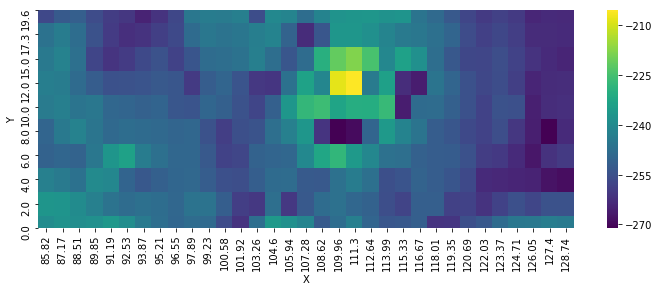

In [23]:
datal=dt1.copy()
dataH_rv=(datal.round(2)).pivot(index='Y', columns='X', values='RV')
fig, ax = plt.subplots(figsize=(12, 4))
sns.heatmap(dataH_rv, cmap="viridis")
plt.gca().invert_yaxis()

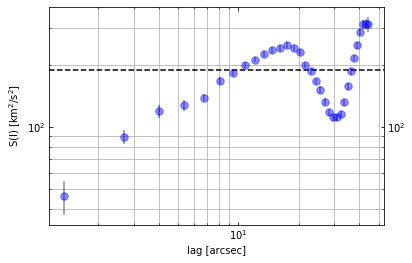

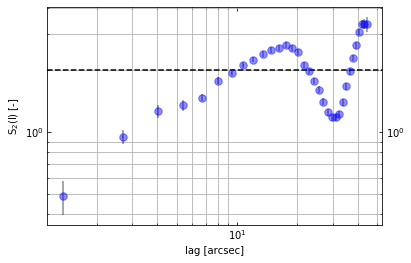

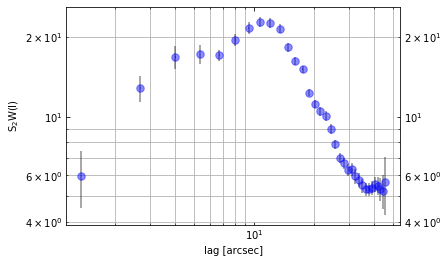

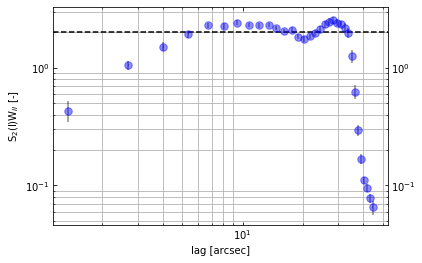

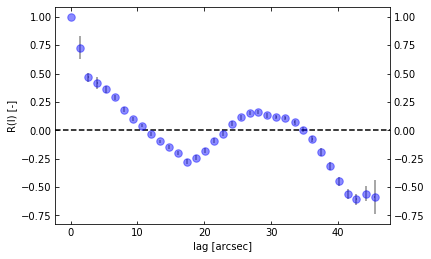

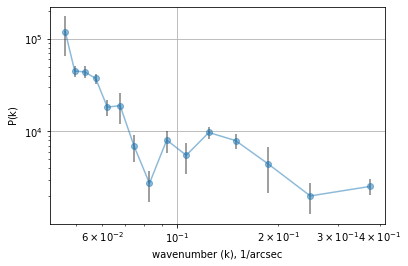

In [24]:
sfH01=sosfs(dt1)
sfnH01=sosfnorms(dt1)
sfwH01=sosfw(dt1)
sfw2H01=sosfw2(dt1)
afH01=acf(dt1)
psH01=ps(dt1)

          3          2
-0.00177 x + 0.5493 x - 56.46 x + 1674


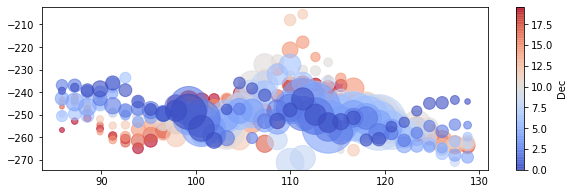

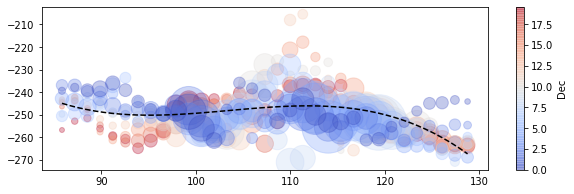

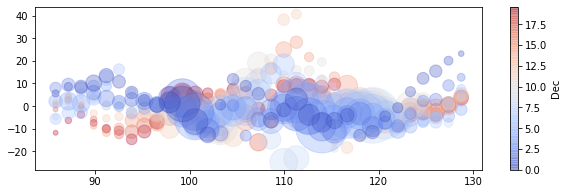

In [25]:
fig, ax = plt.subplots(figsize=(10, 3))
scat = plt.scatter(dt1.X, dt1.RV, c=dt1.Y, s=dt1.I*0.1, alpha=0.6, cmap="coolwarm")
fig.colorbar(scat, ax=ax).set_label("Dec")

pRA = np.poly1d(np.polyfit(dt1.X, dt1.RV, 3))
print(pRA)

fig, ax = plt.subplots(figsize=(10, 3))
scat = plt.scatter(dt1.X, dt1.RV, c=dt1.Y, s=dt1.I*0.1, alpha=0.3, cmap="coolwarm")
fig.colorbar(scat, ax=ax).set_label("Dec")

RAgrid = np.linspace(dt1.X.min(), dt1.X.max())
ax.plot(RAgrid, pRA(RAgrid), c="k", ls="--")

fig, ax = plt.subplots(figsize=(10, 3))
scat = plt.scatter(dt1.X, dt1.RV - pRA(dt1.X), c=dt1.Y, s=dt1.I*0.1, alpha=0.3, cmap="coolwarm")
fig.colorbar(scat, ax=ax).set_label("Dec")


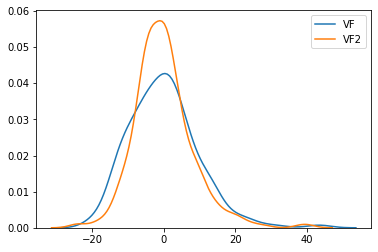

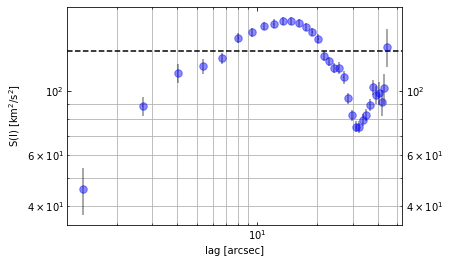

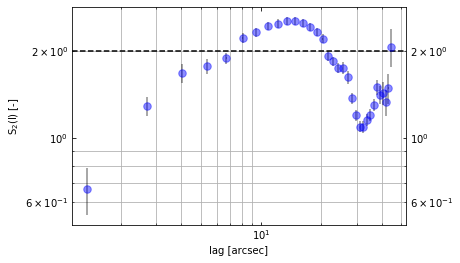

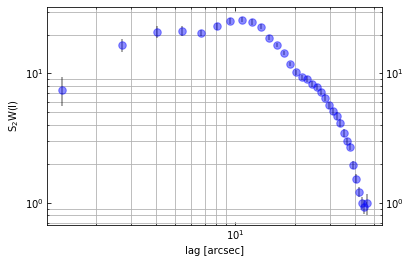

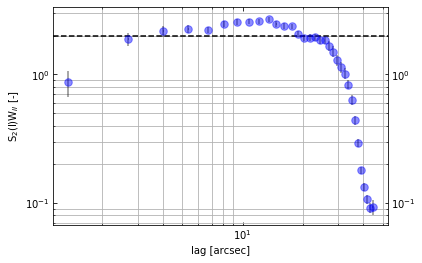

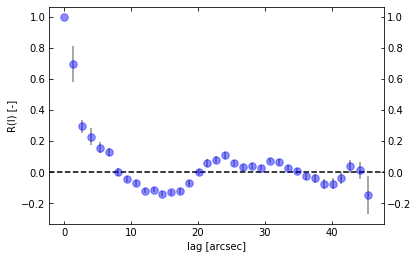

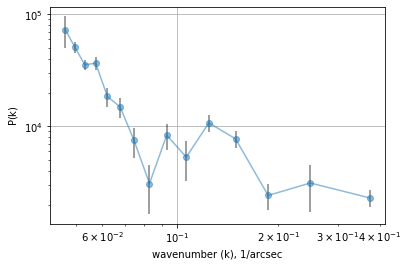

In [26]:
hist=dt1.RV-dt1.RV.mean()
hist2=dt1.RV - pRA(dt1.X)

sns.kdeplot(hist, label="VF")
sns.kdeplot(hist2, label="VF2")

dtc= pd.DataFrame({'X': dt1.X, 'Y': dt1.Y, 'RV':dt1.RV - pRA(dt1.X), 'I':dt1.I})
dtc.describe()

sfH01c=sosfs(dtc)
sfnH01c=sosfnorms(dtc)
sfwH01c=sosfw(dtc)
sfw2H01c=sosfw2(dtc)
afH01c=acf(dtc)
psH01c=ps(dtc)

In [27]:
#III

In [28]:
mr=(dt.X<120)&(dt.X>95)
dt2=dt[mr]
dt2.describe()

,X,Y,RV,I
count,190.000000,190.000000,190.000000,190.000000
mean,107.280526,9.390000,-247.623016,5054.866316
std,7.365136,6.267347,9.806825,5261.747902
min,95.210000,0.000000,-270.969636,401.400000
25%,100.580000,4.000000,-253.382615,1714.250000
50%,107.280000,9.000000,-249.202843,3193.500000
75%,113.990000,15.000000,-243.252948,6317.500000
max,119.350000,19.600000,-205.463695,30960.000000


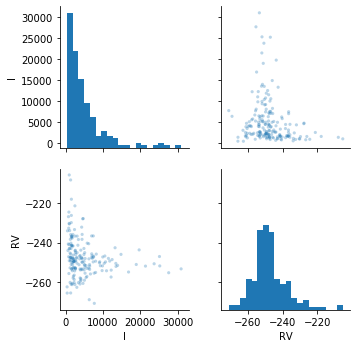

In [29]:
sns.pairplot(dt2, 
             vars=["I","RV"], 
             diag_kind='hist',  
             plot_kws=dict(alpha=0.3, s=10, edgecolor='none'),
             diag_kws=dict(bins=20),
            )

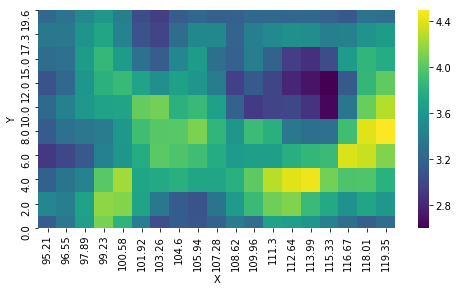

In [30]:
datal=dt2.copy()
datal.I=np.log10(datal.I)
dataH_f=(datal.round(2)).pivot(index='Y', columns='X', values='I')
fig, ax = plt.subplots(figsize=(8, 4))
sns.heatmap(dataH_f, cmap="viridis")
plt.gca().invert_yaxis()

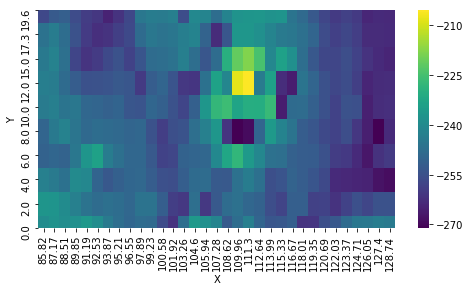

In [31]:
datal=dt1.copy()
dataH_rv=(datal.round(2)).pivot(index='Y', columns='X', values='RV')
fig, ax = plt.subplots(figsize=(8, 4))
sns.heatmap(dataH_rv, cmap="viridis")
plt.gca().invert_yaxis()

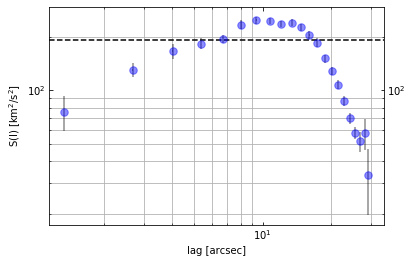

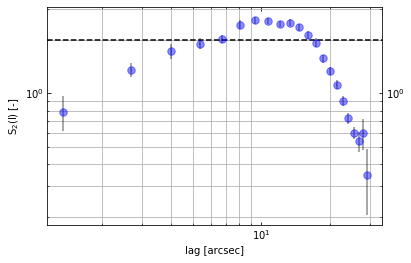

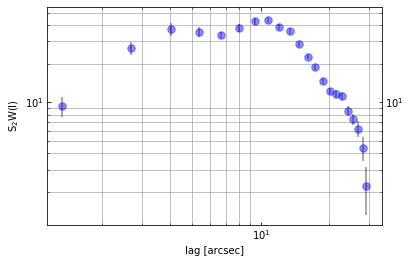

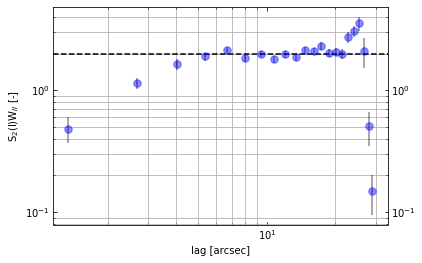

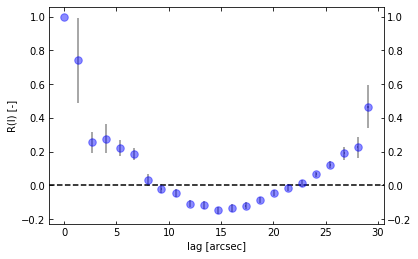

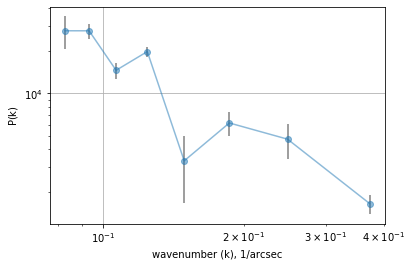

In [32]:
sfH02=sosfs(dt2)
sfnH02=sosfnorms(dt2)
sfwH02=sosfw(dt2)
sfw2H02=sosfw2(dt2)
afH02=acf(dt2)
psH02=ps(dt2)

           3         2
-0.008757 x + 2.755 x - 287.6 x + 9722


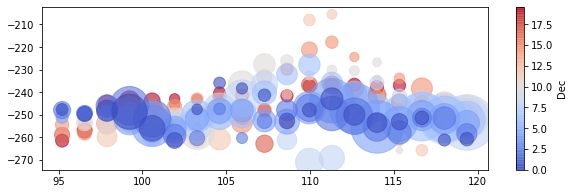

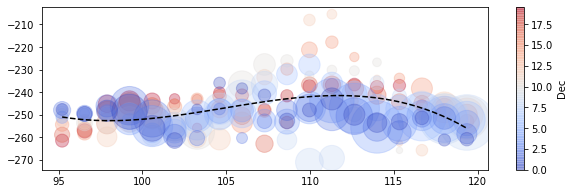

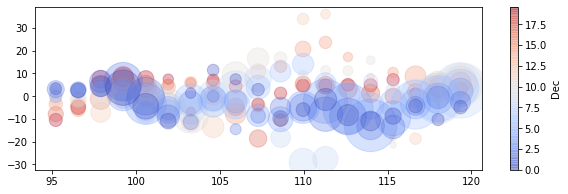

In [33]:
fig, ax = plt.subplots(figsize=(10, 3))
scat = plt.scatter(dt2.X, dt2.RV, c=dt2.Y, s=dt2.I*0.1, alpha=0.6, cmap="coolwarm")
fig.colorbar(scat, ax=ax).set_label("Dec")

pRA = np.poly1d(np.polyfit(dt2.X, dt2.RV, 3))
print(pRA)

fig, ax = plt.subplots(figsize=(10, 3))
scat = plt.scatter(dt2.X, dt2.RV, c=dt2.Y, s=dt2.I*0.1, alpha=0.3, cmap="coolwarm")
fig.colorbar(scat, ax=ax).set_label("Dec")
RAgrid = np.linspace(dt2.X.min(), dt2.X.max())
ax.plot(RAgrid, pRA(RAgrid), c="k", ls="--")

fig, ax = plt.subplots(figsize=(10, 3))
scat = plt.scatter(dt2.X, dt2.RV - pRA(dt2.X), c=dt2.Y, s=dt2.I*0.1, alpha=0.3, cmap="coolwarm")
fig.colorbar(scat, ax=ax).set_label("Dec")

hist=dt2.RV-dt2.RV.mean()
hist2=dt2.RV - pRA(dt2.X)



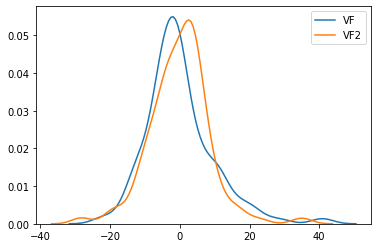

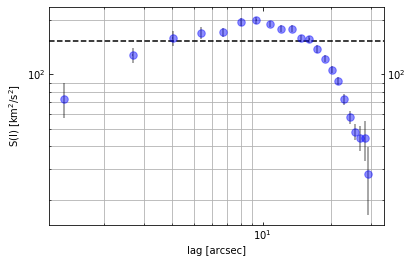

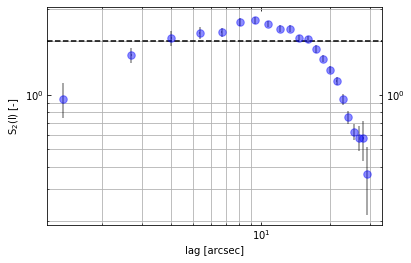

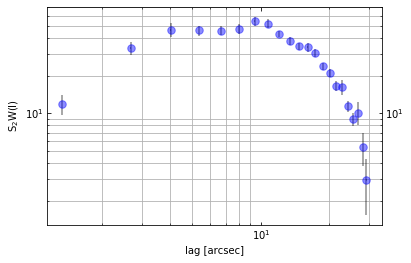

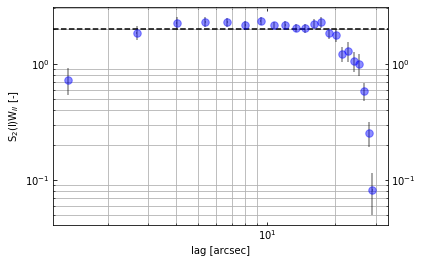

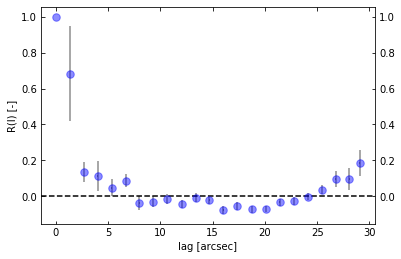

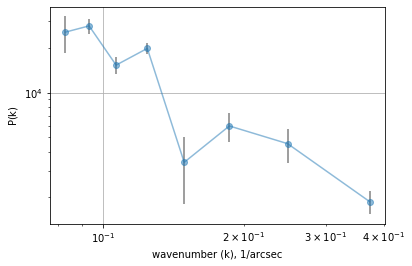

In [34]:
sns.kdeplot(hist, label="VF")
sns.kdeplot(hist2, label="VF2")

dtc= pd.DataFrame({'X': dt2.X, 'Y': dt2.Y, 'RV':dt2.RV - pRA(dt2.X), 'I':dt2.I})
dtc.describe()

sfH02c=sosfs(dtc)
sfnH02c=sosfnorms(dtc)
sfwH02c=sosfw(dtc)
sfw2H02c=sosfw2(dtc)
afH02c=acf(dtc)
psH02c=ps(dtc)

findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.


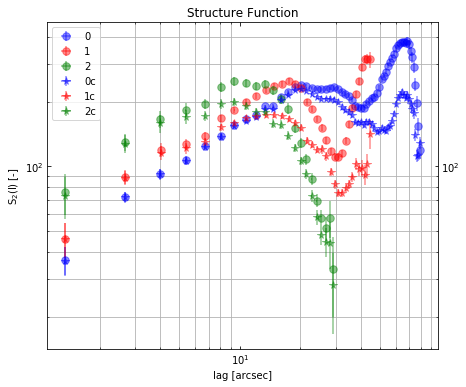

In [35]:
fig, ax=plt.subplots(figsize=(7,6))
ax.errorbar(sfH00['Lag'],sfH00['Nmqvd'],xerr=sfH00.ErrX, yerr=sfH00.ErrY, fmt="o",color='b', ecolor='b', alpha=0.45, markersize=7.5, label='0')
ax.errorbar(sfH01['Lag'],sfH01['Nmqvd'],xerr=sfH01.ErrX, yerr=sfH01.ErrY, fmt="o",color='r', ecolor='r', alpha=0.45, markersize=7.5, label='1')
ax.errorbar(sfH02['Lag'],sfH02['Nmqvd'],xerr=sfH02.ErrX, yerr=sfH02.ErrY, fmt="o",color='g', ecolor='g', alpha=0.45, markersize=7.5, label='2')
ax.errorbar(sfH00c['Lag'],sfH00c['Nmqvd'],xerr=sfH00c.ErrX, yerr=sfH00c.ErrY, fmt="*",color='b', ecolor='b', alpha=0.45, markersize=7.5, label='0c')
ax.errorbar(sfH01c['Lag'],sfH01c['Nmqvd'],xerr=sfH01c.ErrX, yerr=sfH01c.ErrY, fmt="*",color='r', ecolor='r', alpha=0.45, markersize=7.5, label='1c')
ax.errorbar(sfH02c['Lag'],sfH02c['Nmqvd'],xerr=sfH02c.ErrX, yerr=sfH02c.ErrY, fmt="*",color='g', ecolor='g', alpha=0.45, markersize=7.5, label='2c')
ax.set(xscale='log',yscale='log')
#sgrid = np.logspace(.05, 1.25)
#ax.plot(sgrid, 0.5*sgrid**(2/3), color="k", lw=0.8, label='2/3')
#ax.axhline(y=2, color='k', linestyle='--')
ax.set(xlabel='lag [arcsec]', ylabel='S$_{2}$(l) [-]')
plt.title('Structure Function')
plt.tick_params(which='both', labelright=True, direction='in', right=True,  top=True)
plt.legend(loc='upper left')
plt.grid(which='minor')


plt.rcParams["font.family"]="Times New Roman"
plt.rcParams["font.size"]="15"

findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.


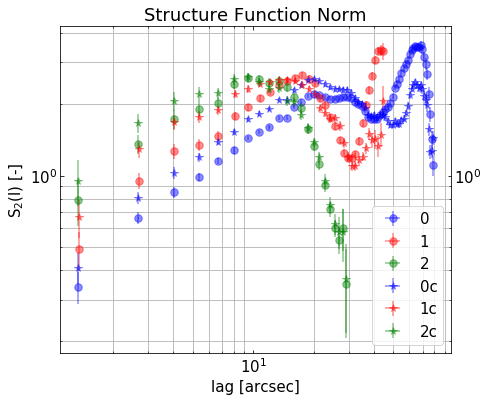

In [36]:
fig, ax=plt.subplots(figsize=(7,6))
ax.errorbar(sfnH00['Lag'],sfnH00['Nmqvd'],xerr=sfnH00.ErrX, yerr=sfnH00.ErrY, fmt="o",color='b', ecolor='b', alpha=0.45, markersize=7.5, label='0')
ax.errorbar(sfnH01['Lag'],sfnH01['Nmqvd'],xerr=sfnH01.ErrX, yerr=sfnH01.ErrY, fmt="o",color='r', ecolor='r', alpha=0.45, markersize=7.5, label='1')
ax.errorbar(sfnH02['Lag'],sfnH02['Nmqvd'],xerr=sfnH02.ErrX, yerr=sfnH02.ErrY, fmt="o",color='g', ecolor='g', alpha=0.45, markersize=7.5, label='2')
ax.errorbar(sfnH00c['Lag'],sfnH00c['Nmqvd'],xerr=sfnH00c.ErrX, yerr=sfnH00c.ErrY, fmt="*",color='b', ecolor='b', alpha=0.45, markersize=7.5, label='0c')
ax.errorbar(sfnH01c['Lag'],sfnH01c['Nmqvd'],xerr=sfnH01c.ErrX, yerr=sfnH01c.ErrY, fmt="*",color='r', ecolor='r', alpha=0.45, markersize=7.5, label='1c')
ax.errorbar(sfnH02c['Lag'],sfnH02c['Nmqvd'],xerr=sfnH02c.ErrX, yerr=sfnH02c.ErrY, fmt="*",color='g', ecolor='g', alpha=0.45, markersize=7.5, label='2c')
ax.set(xscale='log',yscale='log')
#sgrid = np.logspace(.05, 1.25)
#ax.plot(sgrid, 0.5*sgrid**(2/3), color="k", lw=0.8, label='2/3')
#ax.axhline(y=2, color='k', linestyle='--')
ax.set(xlabel='lag [arcsec]', ylabel='S$_{2}$(l) [-]')
plt.title('Structure Function Norm')
plt.tick_params(which='both', labelright=True, direction='in', right=True,  top=True)
plt.legend(loc='lower right')
plt.grid(which='minor')


plt.rcParams["font.family"]="Times New Roman"
plt.rcParams["font.size"]="15"

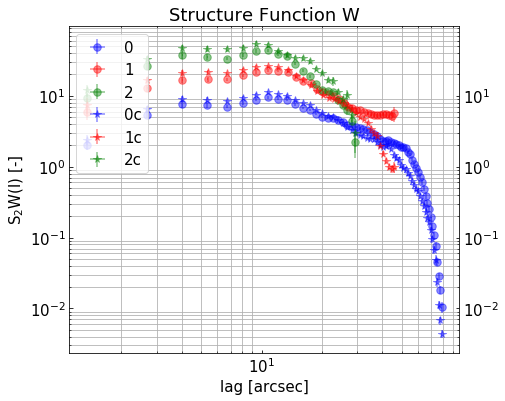

In [37]:
fig, ax=plt.subplots(figsize=(7,6))
ax.errorbar(sfwH00['Lag'],sfwH00['Nmqvd'],xerr=sfwH00.ErrX, yerr=sfwH00.ErrY, fmt="o",color='b', ecolor='b', alpha=0.45, markersize=7.5, label='0')
ax.errorbar(sfwH01['Lag'],sfwH01['Nmqvd'],xerr=sfwH01.ErrX, yerr=sfwH01.ErrY, fmt="o",color='r', ecolor='r', alpha=0.45, markersize=7.5, label='1')
ax.errorbar(sfwH02['Lag'],sfwH02['Nmqvd'],xerr=sfwH02.ErrX, yerr=sfwH02.ErrY, fmt="o",color='g', ecolor='g', alpha=0.45, markersize=7.5, label='2')
ax.errorbar(sfwH00c['Lag'],sfwH00c['Nmqvd'],xerr=sfwH00c.ErrX, yerr=sfwH00c.ErrY, fmt="*",color='b', ecolor='b', alpha=0.45, markersize=7.5, label='0c')
ax.errorbar(sfwH01c['Lag'],sfwH01c['Nmqvd'],xerr=sfwH01c.ErrX, yerr=sfwH01c.ErrY, fmt="*",color='r', ecolor='r', alpha=0.45, markersize=7.5, label='1c')
ax.errorbar(sfwH02c['Lag'],sfwH02c['Nmqvd'],xerr=sfwH02c.ErrX, yerr=sfwH02c.ErrY, fmt="*",color='g', ecolor='g', alpha=0.45, markersize=7.5, label='2c')
ax.set(xscale='log',yscale='log')
#sgrid = np.logspace(.05, 1.25)
#ax.plot(sgrid, 0.5*sgrid**(2/3), color="k", lw=0.8, label='2/3')
#ax.axhline(y=2, color='k', linestyle='--')
ax.set(xlabel='lag [arcsec]', ylabel='S$_{2}$W(l) [-]')
plt.title('Structure Function W')
plt.tick_params(which='both', labelright=True, direction='in', right=True,  top=True)
plt.legend(loc='upper left')
plt.grid(which='minor')


plt.rcParams["font.family"]="Times New Roman"
plt.rcParams["font.size"]="15"

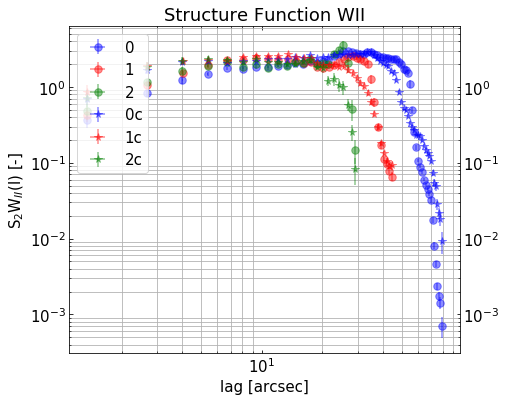

In [38]:
fig, ax=plt.subplots(figsize=(7,6))
ax.errorbar(sfw2H00['Lag'],sfw2H00['Nmqvd'],xerr=sfw2H00.ErrX, yerr=sfw2H00.ErrY, fmt="o",color='b', ecolor='b', alpha=0.45, markersize=7.5, label='0')
ax.errorbar(sfw2H01['Lag'],sfw2H01['Nmqvd'],xerr=sfw2H01.ErrX, yerr=sfw2H01.ErrY, fmt="o",color='r', ecolor='r', alpha=0.45, markersize=7.5, label='1')
ax.errorbar(sfw2H02['Lag'],sfw2H02['Nmqvd'],xerr=sfw2H02.ErrX, yerr=sfw2H02.ErrY, fmt="o",color='g', ecolor='g', alpha=0.45, markersize=7.5, label='2')
ax.errorbar(sfw2H00c['Lag'],sfw2H00c['Nmqvd'],xerr=sfw2H00c.ErrX, yerr=sfw2H00c.ErrY, fmt="*",color='b', ecolor='b', alpha=0.45, markersize=7.5, label='0c')
ax.errorbar(sfw2H01c['Lag'],sfw2H01c['Nmqvd'],xerr=sfw2H01c.ErrX, yerr=sfw2H01c.ErrY, fmt="*",color='r', ecolor='r', alpha=0.45, markersize=7.5, label='1c')
ax.errorbar(sfw2H02c['Lag'],sfw2H02c['Nmqvd'],xerr=sfw2H02c.ErrX, yerr=sfw2H02c.ErrY, fmt="*",color='g', ecolor='g', alpha=0.45, markersize=7.5, label='2c')
ax.set(xscale='log',yscale='log')
#sgrid = np.logspace(.05, 1.25)
#ax.plot(sgrid, 0.5*sgrid**(2/3), color="k", lw=0.8, label='2/3')
#ax.axhline(y=2, color='k', linestyle='--')
ax.set(xlabel='lag [arcsec]', ylabel='S$_{2}$W$_{II}$(l) [-]')
plt.title('Structure Function WII')
plt.tick_params(which='both', labelright=True, direction='in', right=True,  top=True)
plt.legend(loc='upper left')
plt.grid(which='minor')


plt.rcParams["font.family"]="Times New Roman"
plt.rcParams["font.size"]="15"

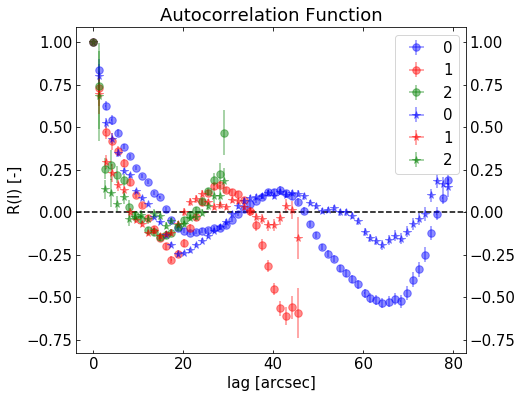

In [39]:
fig, ax=plt.subplots(figsize=(7,6))
ax.errorbar(afH00['Lag'],afH00['Nmqvd'],xerr=afH00.ErrX, yerr=afH00.ErrY, fmt="o",color='b', ecolor='b', alpha=0.45, markersize=7.5, label='0')
ax.errorbar(afH01['Lag'],afH01['Nmqvd'],xerr=afH01.ErrX, yerr=afH01.ErrY, fmt="o",color='r', ecolor='r', alpha=0.45, markersize=7.5, label='1')
ax.errorbar(afH02['Lag'],afH02['Nmqvd'],xerr=afH02.ErrX, yerr=afH02.ErrY, fmt="o",color='g', ecolor='g', alpha=0.45, markersize=7.5, label='2')
ax.errorbar(afH00c['Lag'],afH00c['Nmqvd'],xerr=afH00c.ErrX, yerr=afH00c.ErrY, fmt="*",color='b', ecolor='b', alpha=0.45, markersize=7.5, label='0')
ax.errorbar(afH01c['Lag'],afH01c['Nmqvd'],xerr=afH01c.ErrX, yerr=afH01c.ErrY, fmt="*",color='r', ecolor='r', alpha=0.45, markersize=7.5, label='1')
ax.errorbar(afH02c['Lag'],afH02c['Nmqvd'],xerr=afH02c.ErrX, yerr=afH02c.ErrY, fmt="*",color='g', ecolor='g', alpha=0.45, markersize=7.5, label='2')
#ax.set(xscale='log',yscale='log')
#sgrid = np.logspace(.05, 1.25)
#ax.plot(sgrid, 0.5*sgrid**(2/3), color="k", lw=0.8, label='2/3')
ax.axhline(y=0, color='k', linestyle='--')
ax.set(xlabel='lag [arcsec]', ylabel='R(l) [-]')
plt.title('Autocorrelation Function')
plt.tick_params(which='both', labelright=True, direction='in', right=True,  top=True)
plt.legend(loc='upper right')
plt.grid(which='minor')


plt.rcParams["font.family"]="Times New Roman"
plt.rcParams["font.size"]="15"

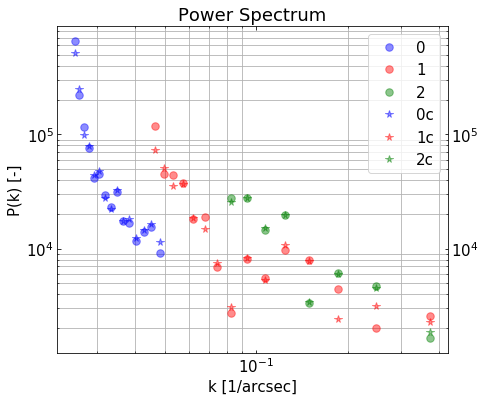

In [41]:
fig, ax=plt.subplots(figsize=(7,6))
ax.errorbar(psH00['k'],psH00['Pk'], fmt="o",color='b', ecolor='b', alpha=0.45, markersize=7.5, label='0')
ax.errorbar(psH01['k'],psH01['Pk'], fmt="o",color='r', ecolor='r', alpha=0.45, markersize=7.5, label='1')
ax.errorbar(psH02['k'],psH02['Pk'], fmt="o",color='g', ecolor='g', alpha=0.45, markersize=7.5, label='2')
ax.errorbar(psH00c['k'],psH00c['Pk'], fmt="*",color='b', ecolor='b', alpha=0.45, markersize=7.5, label='0c')
ax.errorbar(psH01c['k'],psH01c['Pk'], fmt="*",color='r', ecolor='r', alpha=0.45, markersize=7.5, label='1c')
ax.errorbar(psH02c['k'],psH02c['Pk'], fmt="*",color='g', ecolor='g', alpha=0.45, markersize=7.5, label='2c')
ax.set(xscale='log',yscale='log')
#sgrid = np.logspace(.05, 1.25)
#ax.plot(sgrid, 0.5*sgrid**(2/3), color="k", lw=0.8, label='2/3')
#ax.axhline(y=2, color='k', linestyle='--')
ax.set(xlabel='k [1/arcsec]', ylabel='P(k) [-]')
plt.title('Power Spectrum')
plt.tick_params(which='both', labelright=True, direction='in', right=True,  top=True)
plt.legend(loc='upper right')
plt.grid(which='minor')


plt.rcParams["font.family"]="Times New Roman"
plt.rcParams["font.size"]="15"